### First question ###

The hierarchy I planned:

General Neuron
    firing_rate
    Activate

    Sensory Neuron
        Photoreceptor
        Mechanoreceptor
            
    Motor Neuron
        Alpha Motor Neuron
        Gamma Motor Neuron

In [ ]:
from graphviz import Digraph
# Found a package that can plot the hierarchy, Hemda approved.

# First in the hierarchy
class Neuron:
    def __init__(self, firing_range) -> None:
        self.firing_range = firing_range
        
    def activate(self):
        pass

# Second in the hierarchy, inheriting 'Neuron'.
class Sensory(Neuron):
    def __init__(self, firing_range, receptor_type) -> None:
        super().__init__(firing_range)
        self.receptor_type = receptor_type
        
    def sense_stimulus(self):
        pass

# Third in the hierarchy, inheriting 'Sensory'.
class Photoreceptor(Sensory):
    def __init__(self, firing_range, receptor_type, light_detection) -> None:
        super().__init__(firing_range, receptor_type)
        self.light_detection = light_detection
        
    def unique_response_to_light(self):
        pass

# Third in the hierarchy, inheriting 'Sensory'.
class Mechanoreceptor(Sensory):
    def __init__(self, firing_range, receptor_type, pressure_detection) -> None:
        super().__init__(firing_range, receptor_type)
        self.pressure_detection = pressure_detection
        
    def unique_response_to_pressure(self):
        pass

# Second in the hierarchy, inheriting 'Neuron'.
class Motor(Neuron):
    def __init__(self, firing_range, target_muscle) -> None:
        super().__init__(firing_range)
        self.target_muscle = target_muscle
        
    def control_muscle(self):
        pass

# Third in the hierarchy, inheriting 'Motor'.
class Alpha_Motor(Motor):
    def __init__(self, firing_range, target_muscle, skeletal_muscle_control) -> None:
        super().__init__(firing_range, target_muscle)
        self.skeletal_muscle_control = skeletal_muscle_control
        
    def response_specific_to_skeletal_muscle(self):
        pass

# Third in the hierarchy, inheriting 'Motor'.
class Beta_Motor(Motor):
    def __init__(self, firing_range, target_muscle, muscle_spindle_control) -> None:
        super().__init__(firing_range, target_muscle)
        self.muscle_spindle_control = muscle_spindle_control
        
    def Unique_control_mechanism(self):
        pass

# Create the graph.
#dot = Digraph(comment='OOP Hierarchy')
#dot.attr(rankdir='TB')  # Top to Bottom layout

# Add nodes.
#classes = [Neuron, Sensory, Photoreceptor, Mechanoreceptor, Motor, Alpha_Motor, Beta_Motor]

# First add all nodes.
#for cls in classes:
#    dot.node(cls.__name__)

# Then add all edges.
#for cls in classes:
#    for base in cls.__bases__:
#        if base.__name__ != 'object':  # Skip the base 'object' class
#            dot.edge(base.__name__, cls.__name__)

# Save the graph.
#dot.render('class_hierarchy', format='png', cleanup=True)
#print("Class hierarchy saved to class_hierarchy.png")

Class hierarchy saved to class_hierarchy.png


### Second question ###

### Q1 ###


Numpy can easily create a sine wave sample. I then downsample by collecting all 5th indices into a set which makes it easier to make sure all the maxima and minima indices are also included. Then a new variable storing the compressed sine wave is plotted in comparison to the original.

I had to compress also the time values so that their quantity match that of the compressed number of amplitude values. (They also have to be matching pairs so that the graph is still continous) 

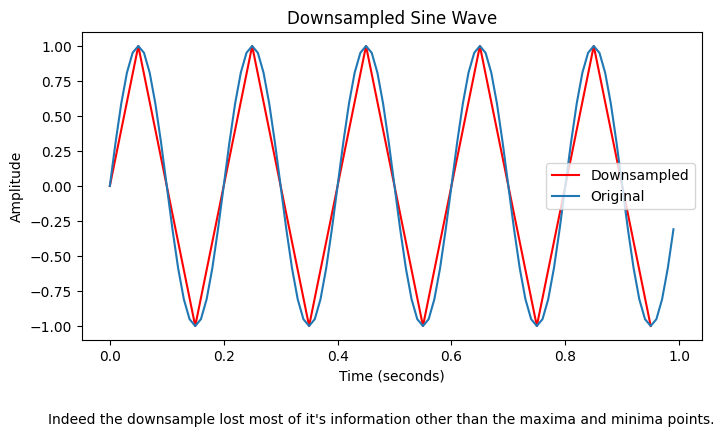

Original sine_wave np.array len: 100
Length of new downsampled sine wave: 20
Ratio between arrays: 20.0 %


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Values given in the instructions:
duration = 1 #sec
sampling_rate = 1 / 0.01 #Hz
frequency = 5 #Hz

time_value = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate sine wave.
sine_wave = np.sin(2 * np.pi * frequency * time_value)

def sine_down_sample(sine_wave, time_value):
    ### A function to downsample a sine wave array using NumPy ###
    ### Input: sine wave np.array and time value used to plot the same sine file ###
    ### Output: downsampled np.array for both sine wave and time at 20% of the original size ###

    # Compute the derivative.
    derivative = np.diff(sine_wave)

    # Find indices where derivative changes sign.
    maxima_indices = np.where((derivative[:-1] > 0) & (derivative[1:] < 0))[0] + 1
    minima_indices = np.where((derivative[:-1] < 0) & (derivative[1:] > 0))[0] + 1

    # downsample by keeping only every 5th data point in the entire range of the sine_wave array.
    down_sample_indices = np.arange(0, len(sine_wave), 5)

    # Merge the downsample indices with the maxima and minima's using np.concatenate.
    # useing np.unique to make sure no values repeat themselves.
    merged_indices = np.unique(np.concatenate((down_sample_indices, maxima_indices, minima_indices)))

    # save only the array values of the merged indices for both the original time values and sine wave.
    down_sampled_sine = sine_wave[merged_indices]
    down_sampled_time = time_value[merged_indices]

    # return both an array of downsampled sine and time values.
    # the instructions asked for only the downsampled sine array to be returned. I added also the time values
    # so it is possible to test-plot the sine wave again.
    return down_sampled_sine, down_sampled_time

down_sampled_sine, down_sampled_time = sine_down_sample(sine_wave, time_value)

# plot the new downsampled sine wave to compare with the original, commenting on the loss of data following the compression.
plt.figure(figsize=(8, 4))
plt.plot(down_sampled_time, down_sampled_sine, label="Downsampled", color='red')
plt.plot(time_value, sine_wave, label="Original")
plt.figtext(0.5, -0.1, "Indeed the downsample lost most of it's information other than the maxima and minima points.", ha='center', fontsize=10)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.title("Sine Wave comparison")
plt.show()

# Print the final results.
print("Original sine_wave np.array len:",len(sine_wave))
print("Length of new downsampled sine wave:",len(down_sampled_sine))
print("Ratio between arrays:",(len(down_sampled_sine) / len(sine_wave))*100,"%")  

### Q2 ###

The average price by company:
 Company
Vero          217.425000
Mediacom      295.000000
Chuwi         314.296667
Acer          633.464455
Fujitsu       729.000000
HP           1080.314664
Lenovo       1093.862215
Asus         1123.829737
Xiaomi       1133.462500
Dell         1199.225120
Toshiba      1267.812500
Samsung      1413.444444
Huawei       1424.000000
Apple        1564.198571
Microsoft    1612.308333
Google       1677.666667
MSI          1728.908148
LG           2099.000000
Razer        3346.142857
Name: Price (Euro), dtype: float64


The company with the most expansive average price: Razer at: 3346.1428571428573 Euro




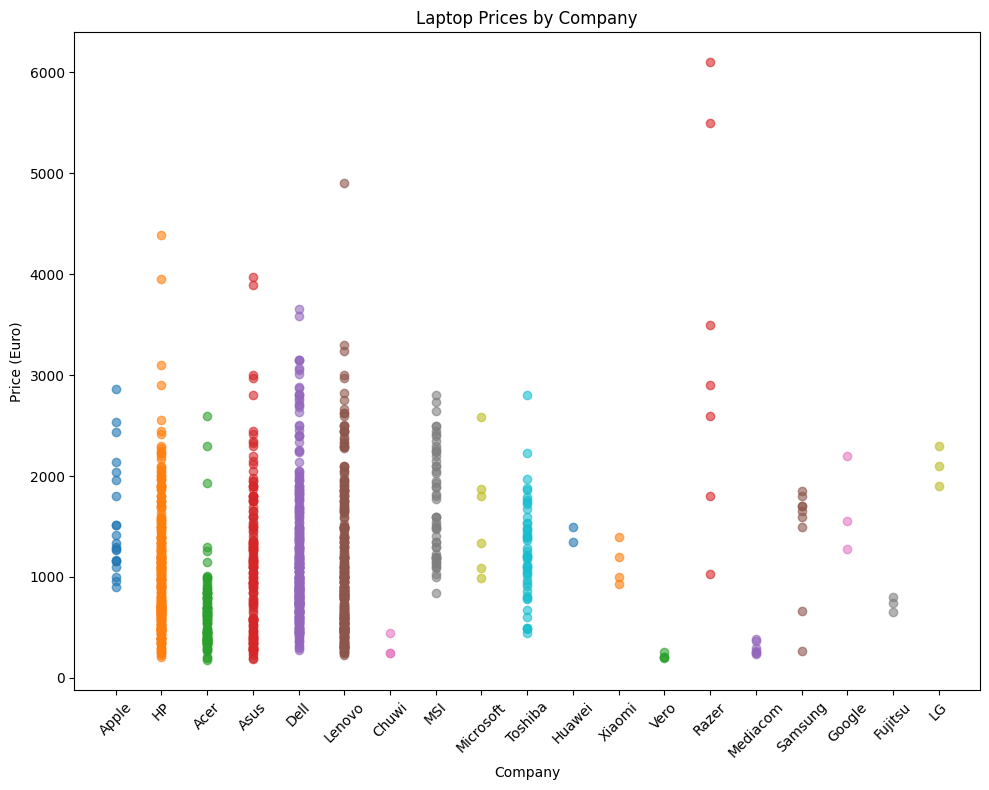

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data using pandas.
data = pd.read_csv('laptop_price - dataset.csv')

# Scatter plot: prices vs. manufacturers.
plt.figure(figsize=(10, 8))
for Company in data['Company'].unique():
    subset = data[data['Company'] == Company]
    plt.scatter([Company] * len(subset), subset['Price (Euro)'], alpha=0.6, label=Company)

# Calculate and print the average price of each company in order.
average_prices = data.groupby('Company')['Price (Euro)'].mean().sort_values()
print("The average price by company:\n", average_prices)
print("\n")

# Find and print the company with the most expansive average price.
most_expansive_average = average_prices.max()
most_expansive_company = average_prices.idxmax()

print("The company with the most expansive average price:",
    most_expansive_company, "at:", most_expansive_average, "Euro", "\n")

# Plot the results.
plt.title('Laptop Prices by Company')
plt.xlabel('Company')
plt.ylabel('Price (Euro)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Manually find different operating systems, make ones that are written differently uniform.

'Other' OS names:
[]


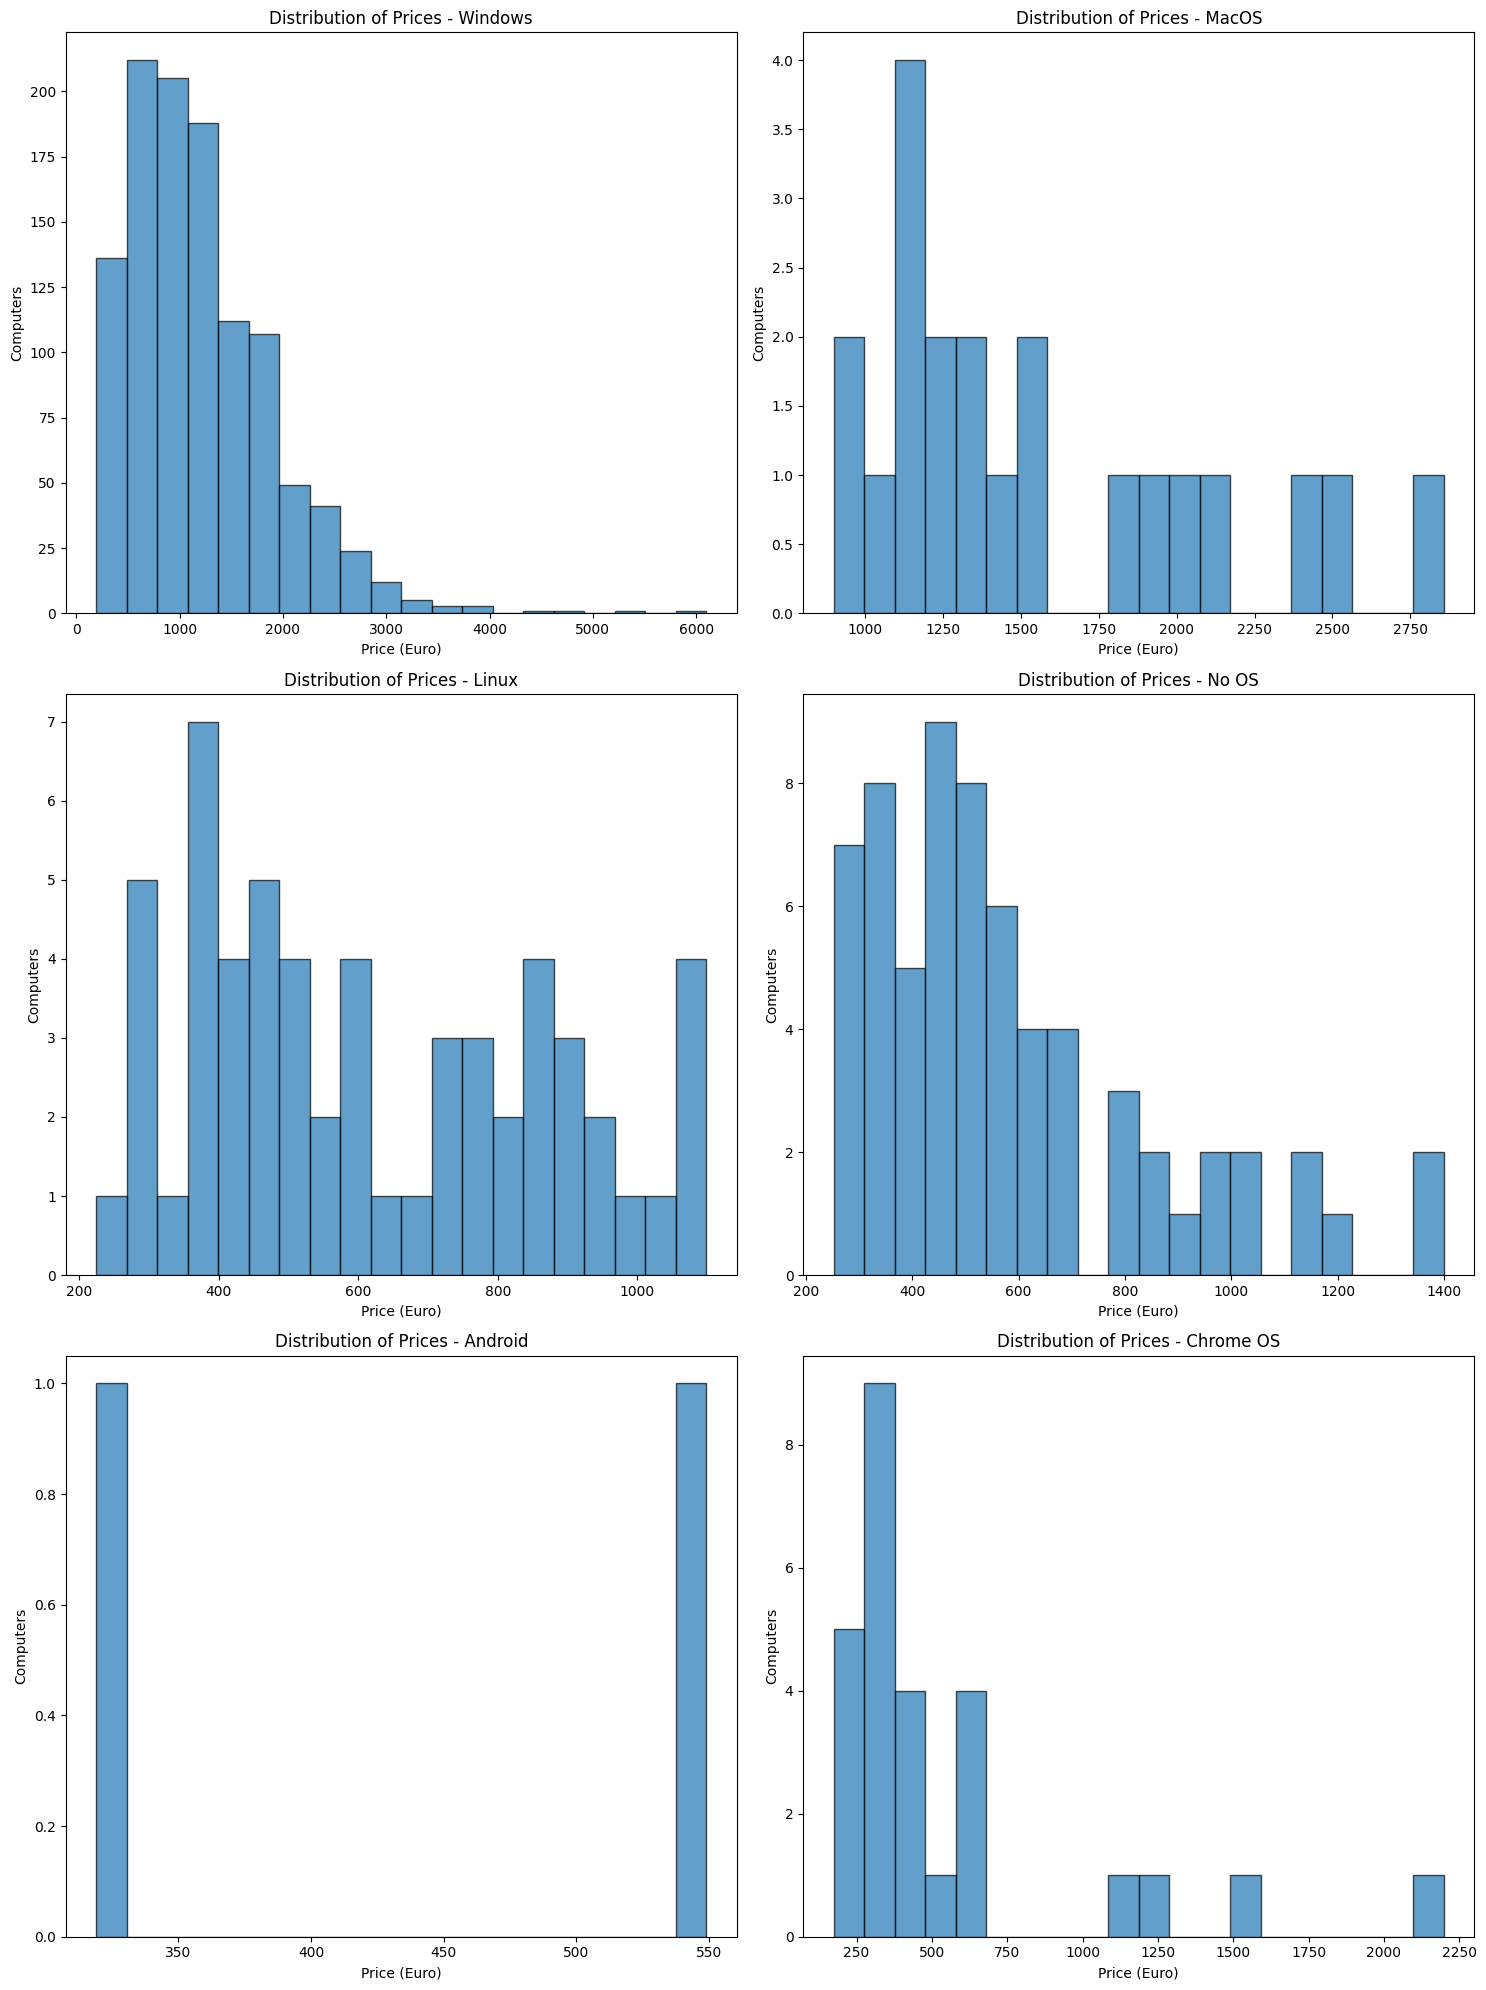

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset.
data = pd.read_csv('laptop_price - dataset.csv')

# Define a mapping dictionary for OS names.
os_mapping = {
    'Windows': ['Windows 10', 'Windows 7', 'Windows 10 S'],
    'MacOS': ['MacOS', 'Mac OS X', 'macOS'],
    'Linux': ['Linux'],
    'No OS': ['No OS'],
    'Android': ['Android'],
    'Chrome OS': ['Chrome OS']
}

# Normalize OS names
def map_os(os_name):
    ### A function to compare each unique os name to the mapping data and return the normalized name.
    ### If a unique name is not in the mapping data return 'Other' which is used for manual addition later.

    for key, values in os_mapping.items():
        if os_name in values:
            return key
    return 'Other'

# use the map function to change unique op system names to the corresponding normalized key in the dictionary.
data['normalized_OS'] = data['OpSys'].apply(map_os)

# For manual addition of unique names: Get all 'Other' OS names
other_laptops = data[data['normalized_OS'] == 'Other']

# Print unique 'Other' OS names for manual addition
print("'Other' OS names:")
print(other_laptops['OpSys'].unique())

# Separate data by normalized OS
os_groups = ['Windows', 'MacOS', 'Linux', 'No OS', 'Android', 'Chrome OS']

# Set up the plotting area for the 6 different OS Groups 
# and loop the plotting process to reduce uneccesary repetition.
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 20)) 
axes = axes.flatten()

# Plot a distribution curve for the prices of each op_group. 
# 'i' is used to access the correct axis out of the six prepared.
for i, os_group in enumerate(os_groups):
     ax = axes[i]
     # Accessing data from only one kind of normalized operating systems for each graph.
     os_data = data[data['normalized_OS'] == os_group]['Price (Euro)'] 
     ax.hist(os_data, bins=20, edgecolor='k', alpha=0.7) 
     ax.set_title(f'Distribution of Prices - {os_group}') 
     ax.set_xlabel('Price (Euro)') 
     ax.set_ylabel('Computers') 
       
plt.tight_layout() 
plt.show()

I predict that the more RAM a computer has the more expansive it will be.

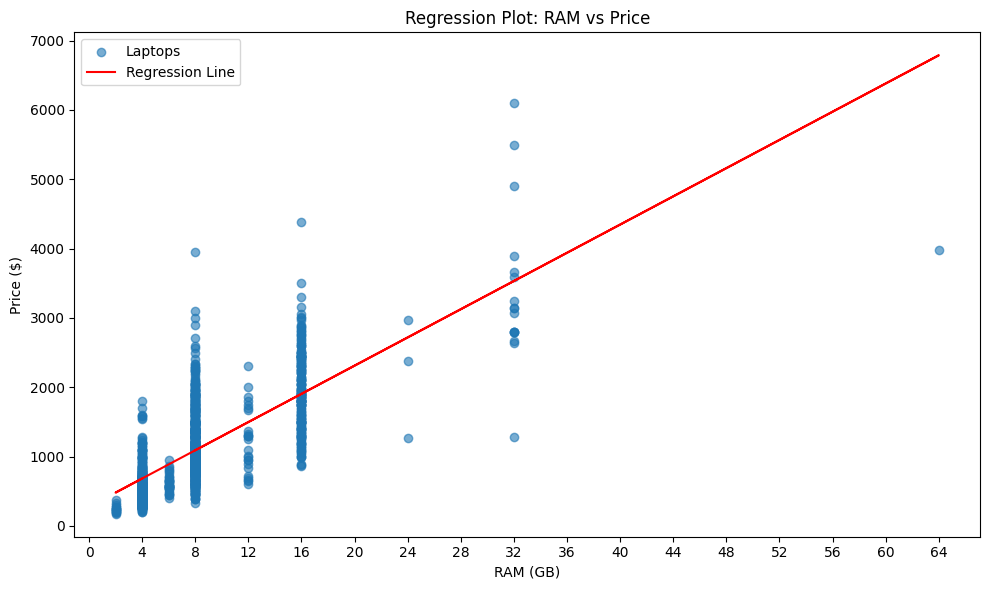

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('laptop_price - dataset.csv')

# Extract the needed variables.
x = data['RAM (GB)']
y = data['Price (Euro)']

# Perform linear regression using NumPy
coefficients = np.polyfit(x, y, deg=1)
regression_line = np.poly1d(coefficients)

# Generate predicted values
y_pred = regression_line(x)

# Plot data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, label='Laptops')
plt.plot(x, y_pred, color='red', label='Regression Line')

# Customize x-axis to show multiples of 4, best fitting for GB
plt.xticks(np.arange(0, x.max() + 1, 4))

# Plot the results
plt.title('Regression Plot: RAM vs Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price ($)')
plt.legend()
plt.tight_layout()
plt.show()

Creating new column "Memory".

In [16]:
import pandas as pd

# Load data
data = pd.read_csv('laptop_price - dataset.csv')

data['Storage_Type'] = '' # Create new empty column 'Storage_Type'.

# Iterate over each row and extract storage type from the 'Memory' column.
for index, row in data.iterrows():
    # Initialize an empty list to store storage types, in case there are more than one.
    storage_types = []

    # Check if 'SSD' is in the 'Memory' column.
    if 'SSD' in row['Memory']:
        storage_types.append('SSD')
    
    # Check if 'HDD' is in the 'Memory' column.
    if 'HDD' in row['Memory']:
        storage_types.append('HDD')
    
    # Check if 'Flash Storage' is in the 'Memory' column.
    if 'Flash Storage' in row['Memory']:
        storage_types.append('Flash Storage')

    # Check if 'Hybrid' is in the 'Memory' column.
    if 'Hybrid' in row['Memory']:
        storage_types.append('Hybrid')

    # Combine storage types with a '+' if there are multiple types, or take the first one if there is only one.
    if storage_types:
        data.at[index, 'Storage_Type'] = ' + '.join(storage_types)
    else:
        # Leave 'None' in storage type. Can be used to manually add missing storage types to the logic.
        data.at[index, 'Storage_Type'] = 'None'

# Check if all rows of Storage_Type were indexed successfully.
if data['Storage_Type'].str.contains('None').any():
    print("Error: there are unindexed storage types")
else:
    print("All Storage Types were indexed successfully.") 

# Create new .csv file with the changes.
data.to_csv('updated_laptop_dataset.csv', index=False)
print("New .csv file created as: 'updated_laptop_dataset.csv'")       

All Storage Types were indexed successfully.
New .csv file created as: 'updated_laptop_dataset.csv'


### Bonus question ###

Additional questions for the dataset:
1. Does the amount of RAM memory correlate with drive space in each computer?
    Regression plot for RAM vs drive space.
    Calculate regression coefficient (r^2) to determine the degree of correlation.

2. On average, does Nvidia graphic cards support higher resolution displays than Intel graphic cards?
    Scatter plot with resolution on the X axis, and frequency on the Y axis with red/blue dots for eaach company respectively.
    Extract the resolution for each company and compare the averages.

3. Does bigger screen size in inches correlate with higher resolution display?
    Regression plot of screen size on the X axis and resolution on the Y axis.
    Calculate regression coefficient (r^2) to determine the degree of correlation.

4. Does 'No OS' computers tend to be cheaper than ones with OS preinstalled?
    Extract both sets as 'OS' vs 'No Os' and copare the average price.

5. Which Operating system is by average more expansive to have pre-installed?
    compare average price of each set of OS's.
    Not ideal because For best the results I Need to compare two identical computers for each OS group, once installed and once without.

6. Are Ultrabooks lighter on average than Notebooks which in turn are lighter than Gaming laptops, etc. ?
    Compare average weight of all TypeNames.

7. Which CPU models have the highest clock speed?
    Create an ordered set with each type of processor and it's corresponding clock speed (in their own set)
    (even better if used with NumPy To save computational resources).

8. Which CPU company has the highest average/absolute clock speed?
    Compare averages of each company set clock speeds, and compare the .max of each to find the absolute one.

9. Which TypeName is most likely to have both SSD + HDD drives?
    Sift through the list appending all computers that have both SSD and HDD to a new list,
    Then group by TypeName.  


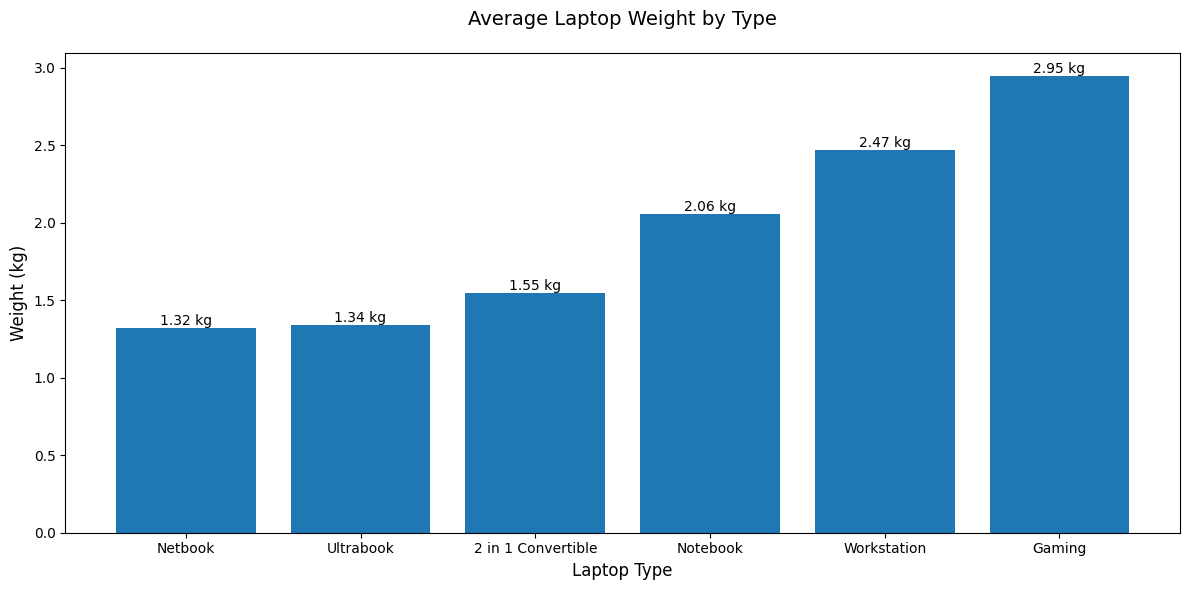

In [ ]:
### Idea 6 ### 
# plot a comparison between the average weight of each laptop type.
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset.
data = pd.read_csv('laptop_price - dataset.csv')

# Calculate average weights for each type.
weight_stats = data.groupby('TypeName')['Weight (kg)'].agg(['mean', 'count', 'std']).round(2)
weight_stats = weight_stats.sort_values('mean', ascending=True)  # Sort by mean weight

# Create the bar plot.
plt.figure(figsize=(12, 6))

# Create bars
bars = plt.bar(weight_stats.index, weight_stats['mean'])

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f} kg',
             ha='center', va='bottom')

# Customize the plot
plt.title('Average Laptop Weight by Type', pad=20, fontsize=14)
plt.xlabel('Laptop Type', fontsize=12)
plt.ylabel('Weight (kg)', fontsize=12)

plt.tight_layout()
plt.show()

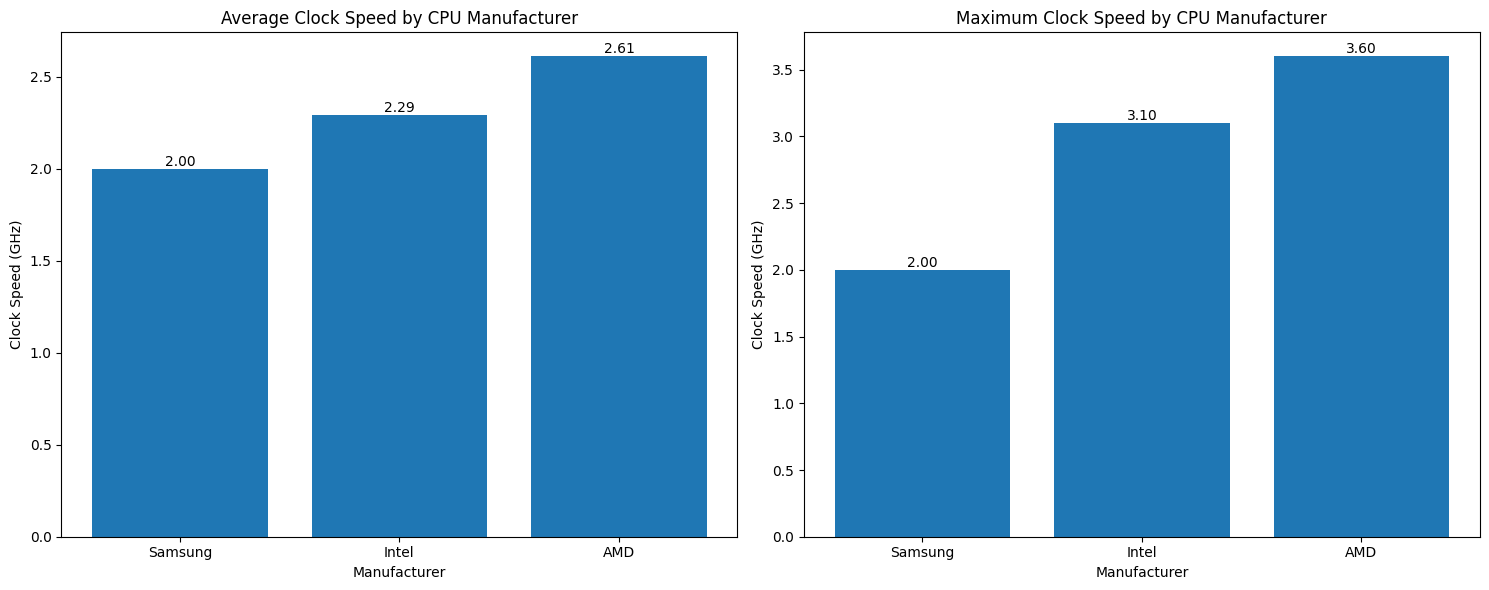

Conclusion: AMD is the best ;)


In [16]:
### Idea 8 ###
# plot a comparison between the mean and max CPU speed by manufacturer.
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('laptop_price - dataset.csv')

# Calculate average and maximum speeds by manufacturer.
avg_speeds = data.groupby('CPU_Company')['CPU_Frequency (GHz)'].agg(['mean', 'max']).round(2)
avg_speeds = avg_speeds.sort_values('mean', ascending=True)

# Create figure with two subplots.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot average clock speeds.
bars1 = ax1.bar(avg_speeds.index, avg_speeds['mean'])
ax1.set_title('Average Clock Speed by CPU Manufacturer')
ax1.set_ylabel('Clock Speed (GHz)')
ax1.set_xlabel('Manufacturer')

# Add value labels on the bars for average speeds
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

# Plot maximum clock speeds.
bars2 = ax2.bar(avg_speeds.index, avg_speeds['max'])
ax2.set_title('Maximum Clock Speed by CPU Manufacturer')
ax2.set_ylabel('Clock Speed (GHz)')
ax2.set_xlabel('Manufacturer')

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("Conclusion: AMD is the best ;)")